In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Importing and analyzing dataset

In [2]:
df = pd.read_csv('winequality-red.csv')

In [46]:
df['output'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  output                1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [48]:
df['output'].value_counts()

0    1382
1     217
Name: output, dtype: int64

In [69]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  output  
0         9.4        5       0  
1         9.8        5       0  
2         9.8        5       0  
3         9.8        6       0  
4         9.4        5       0  
...       ...      ...     ...  
1594     10.5        5       0  
1595     11.2        6       0  
1596     11.0        6       0  
1597     10.2        5       0  
1598     11.0        6       0  

[1599 rows x 13 columns]

# Splitting the data into training set and test set before performing any processing to avoid bias

In [49]:
X = df.drop(['quality', 'output'], axis=1)
y = df['output']
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.5, random_state=101, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_rem, y_rem, test_size=0.5, random_state=101, stratify=y_rem)

# Scaling

In [50]:
X_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1114            5.0             0.400         0.50             4.3      0.046   
874            10.4             0.380         0.46             2.1      0.104   
898             8.3             0.310         0.39             2.4      0.078   
524             9.2             0.430         0.49             2.4      0.086   
1425            8.3             0.260         0.37             1.4      0.076   
...             ...               ...          ...             ...        ...   
334             7.9             0.650         0.01             2.5      0.078   
1570            6.4             0.360         0.53             2.2      0.230   
161             7.6             0.680         0.02             1.3      0.072   
1299            7.6             1.580         0.00             2.1      0.137   
141             8.3             0.715         0.15             1.8      0.089   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1114                 29.0                  80.0  0.99020  3.49       0.66   
874                   6.0                  10.0  0.99664  3.12       0.65   
898                  17.0                  43.0  0.99444  3.31       0.77   
524                  23.0                 116.0  0.99760  3.23       0.64   
1425                  8.0                  23.0  0.99740  3.26       0.70   
...                   ...                   ...      ...   ...        ...   
334                  17.0                  38.0  0.99630  3.34       0.74   
1570                 19.0                  35.0  0.99340  3.37       0.93   
161                   9.0                  20.0  0.99650  3.17       1.08   
1299                  5.0                   9.0  0.99476  3.50       0.40   
141                  10.0                  52.0  0.99680  3.23       0.77   

      alcohol  
1114     13.6  
874      11.8  
898      12.5  
524       9.5  
1425      9.6  
...       ...  
334      11.7  
1570     12.4  
161       9.2  
1299     10.9  
141       9.5  

[799 rows x 11 columns]

In [51]:
y_train.sort_index()

0       0
2       0
6       0
7       1
9       0
       ..
1583    0
1584    1
1590    0
1594    0
1597    0
Name: output, Length: 799, dtype: int64

In [52]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))

0         1         2         3         4         5         6   \
0   -1.976051 -0.674862  1.162794  1.296239 -0.988324  1.287602  0.976918   
1    1.244418 -0.783488  0.956757 -0.323933  0.417302 -1.000154 -1.155087   
2   -0.007987 -1.163676  0.596192 -0.103000 -0.212806  0.093990 -0.149999   
3    0.528758 -0.511925  1.111285 -0.103000 -0.018927  0.690796  2.073378   
4   -0.007987 -1.435238  0.493174 -0.839442 -0.261276 -0.801219 -0.759143   
..        ...       ...       ...       ...       ...       ...       ...   
794 -0.246540  0.682952 -1.361160 -0.029356 -0.212806  0.093990 -0.302285   
795 -1.141115 -0.892113  1.317322 -0.250289  3.470904  0.292925 -0.393657   
796 -0.425455  0.845889 -1.309650 -0.913086 -0.358216 -0.701751 -0.850515   
797 -0.425455  5.734020 -1.412669 -0.323933  1.217055 -1.099621 -1.185544   
798 -0.007987  1.035983 -0.640030 -0.544866  0.053778 -0.602283  0.124116   

           7         8         9         10  
0   -3.449291  1.209420  0.051261  2.869817  
1   -0.026937 -1.284065 -0.011174  1.226799  
2   -1.196064 -0.003627  0.738043  1.865751  
3    0.483228 -0.542759 -0.073609 -0.872613  
4    0.376943 -0.340584  0.301000 -0.781334  
..        ...       ...       ...       ...  
794 -0.207620  0.198548  0.550739  1.135520  
795 -1.748742  0.400722  1.737000  1.774472  
796 -0.101336 -0.947108  2.673522 -1.146449  
797 -1.026009  1.276811 -1.572044  0.405290  
798  0.058091 -0.542759  0.738043 -0.872613  

[799 rows x 11 columns]

In [68]:
X_train

0         1         2         3         4         5         6   \
0   -1.976051 -0.674862  1.162794  1.296239 -0.988324  1.287602  0.976918   
1    1.244418 -0.783488  0.956757 -0.323933  0.417302 -1.000154 -1.155087   
2   -0.007987 -1.163676  0.596192 -0.103000 -0.212806  0.093990 -0.149999   
3    0.528758 -0.511925  1.111285 -0.103000 -0.018927  0.690796  2.073378   
4   -0.007987 -1.435238  0.493174 -0.839442 -0.261276 -0.801219 -0.759143   
..        ...       ...       ...       ...       ...       ...       ...   
794 -0.246540  0.682952 -1.361160 -0.029356 -0.212806  0.093990 -0.302285   
795 -1.141115 -0.892113  1.317322 -0.250289  3.470904  0.292925 -0.393657   
796 -0.425455  0.845889 -1.309650 -0.913086 -0.358216 -0.701751 -0.850515   
797 -0.425455  5.734020 -1.412669 -0.323933  1.217055 -1.099621 -1.185544   
798 -0.007987  1.035983 -0.640030 -0.544866  0.053778 -0.602283  0.124116   

           7         8         9         10  
0   -3.449291  1.209420  0.051261  2.869817  
1   -0.026937 -1.284065 -0.011174  1.226799  
2   -1.196064 -0.003627  0.738043  1.865751  
3    0.483228 -0.542759 -0.073609 -0.872613  
4    0.376943 -0.340584  0.301000 -0.781334  
..        ...       ...       ...       ...  
794 -0.207620  0.198548  0.550739  1.135520  
795 -1.748742  0.400722  1.737000  1.774472  
796 -0.101336 -0.947108  2.673522 -1.146449  
797 -1.026009  1.276811 -1.572044  0.405290  
798  0.058091 -0.542759  0.738043 -0.872613  

[799 rows x 11 columns]

# Feature Selection

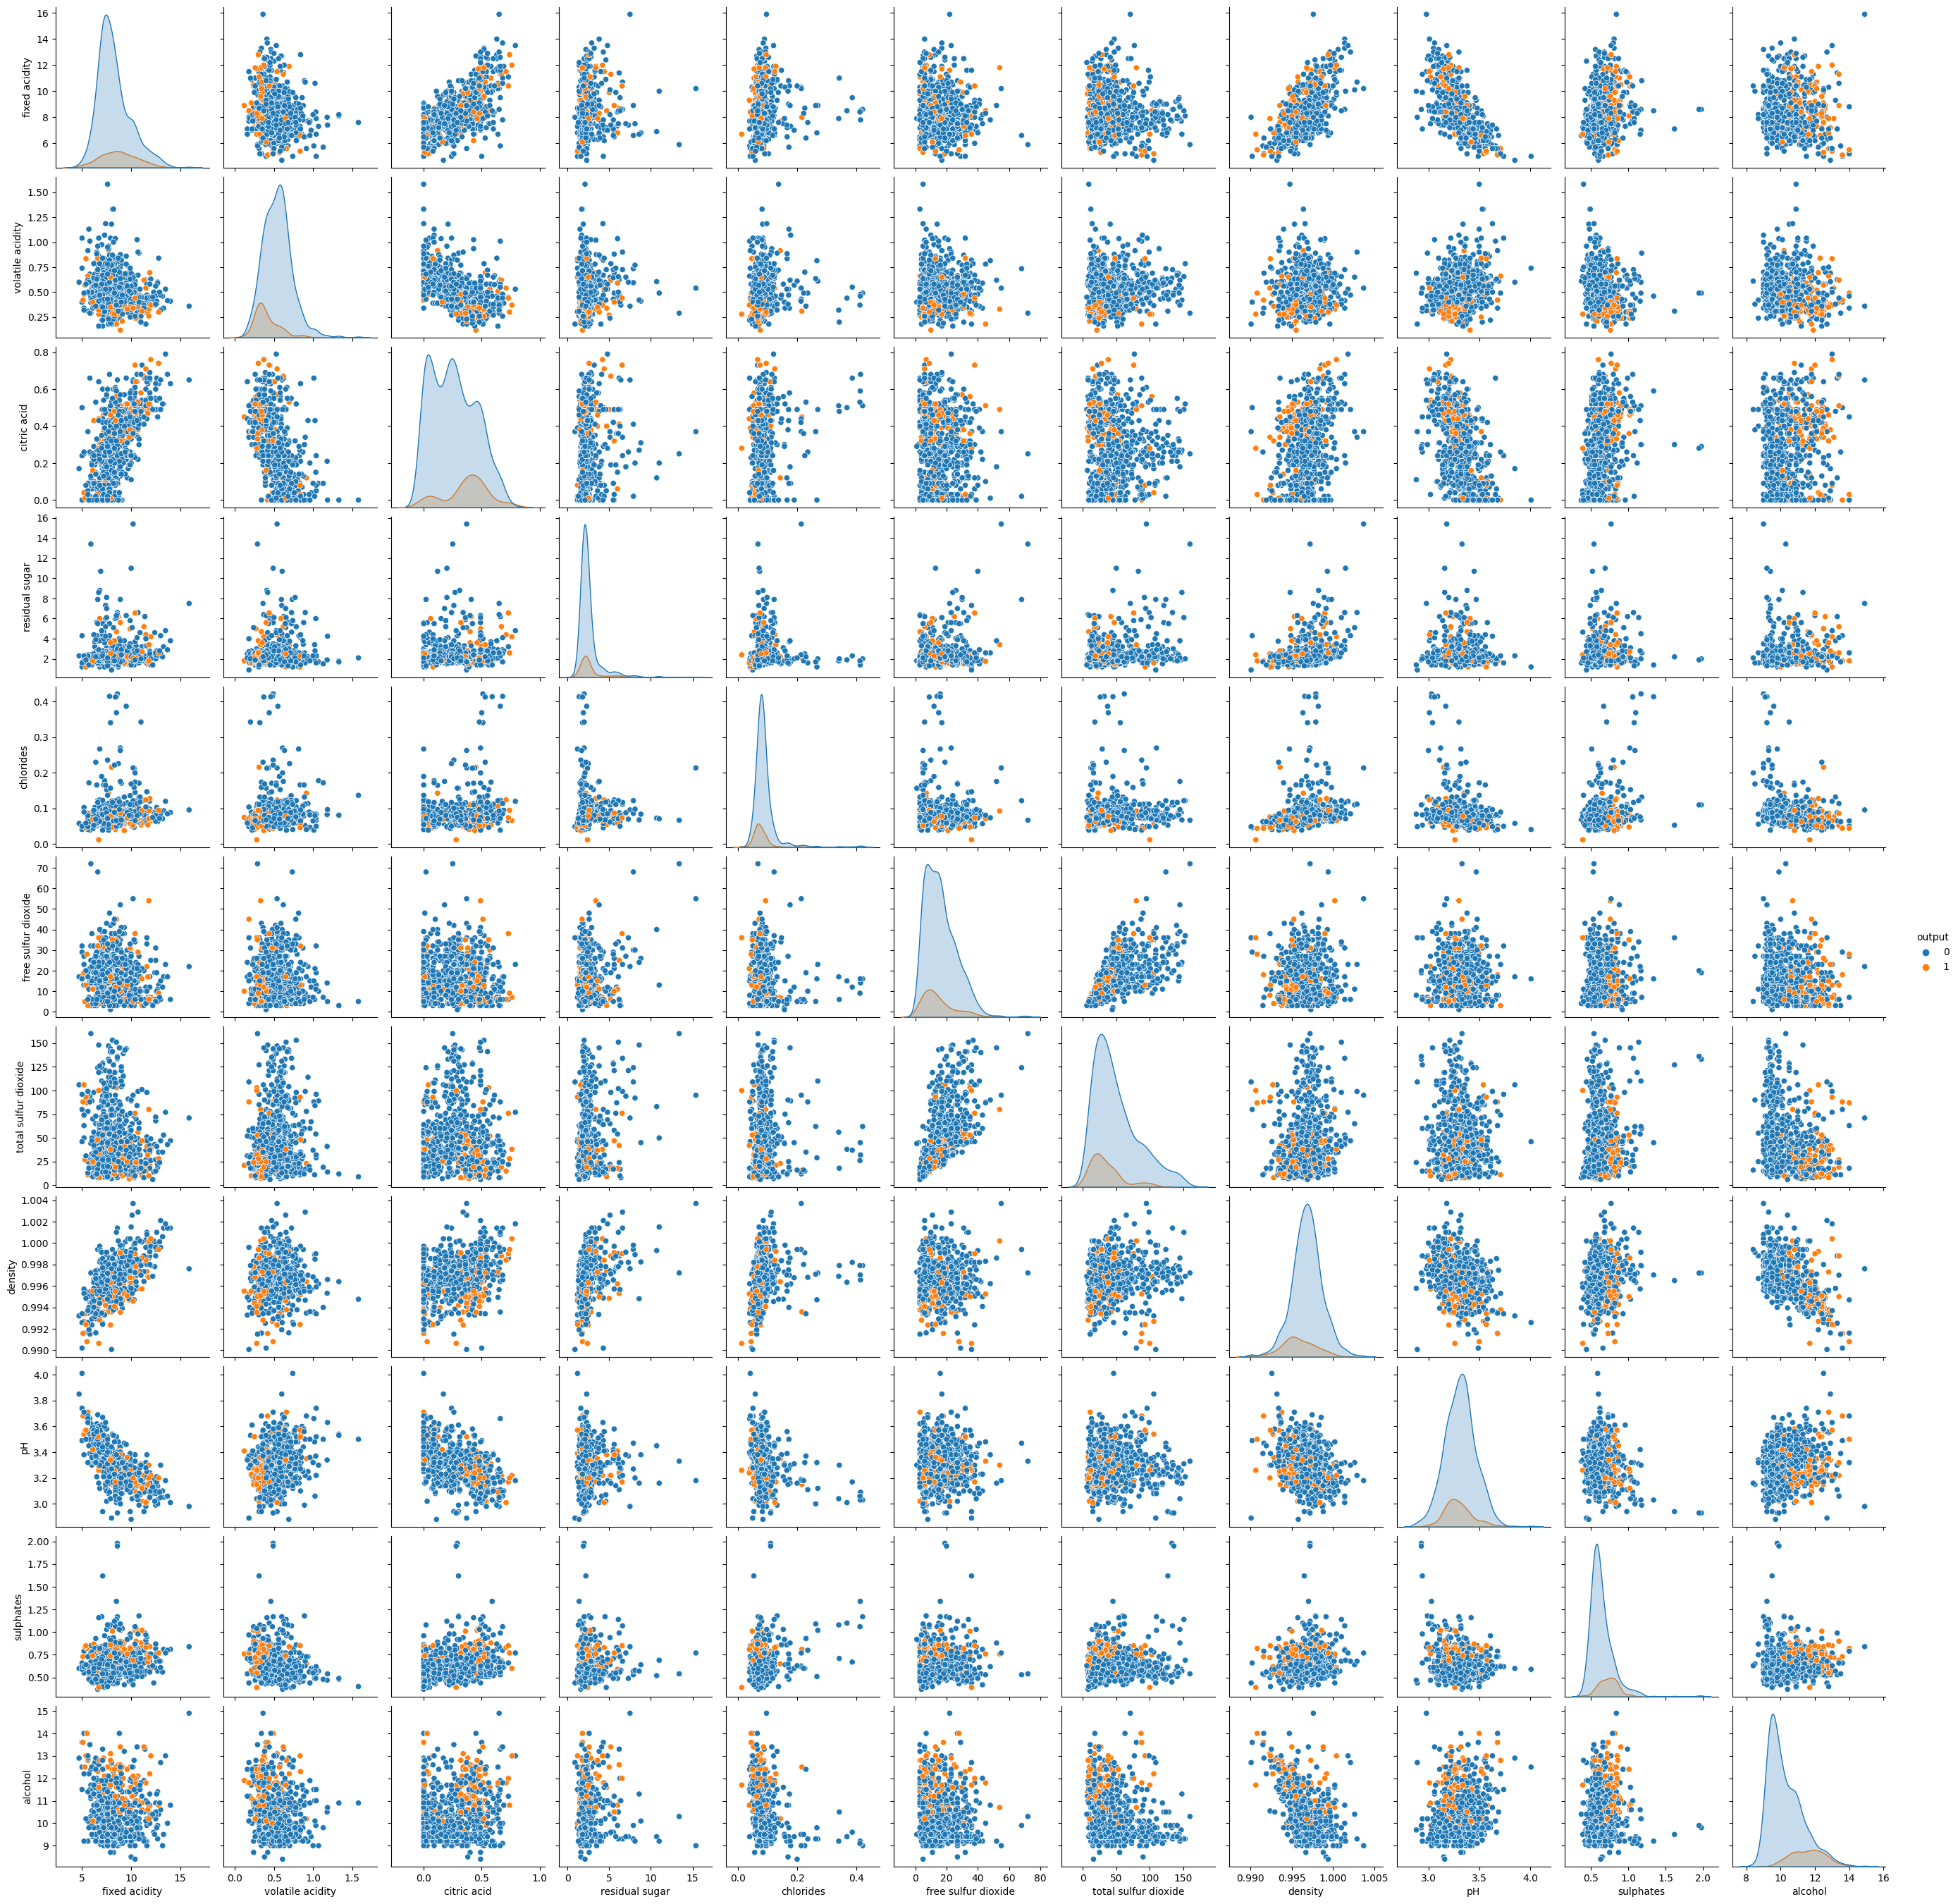

In [22]:
temp = X_train
temp['output'] = y_train
temp
sns.pairplot(data = temp, hue='output')

# Information gain

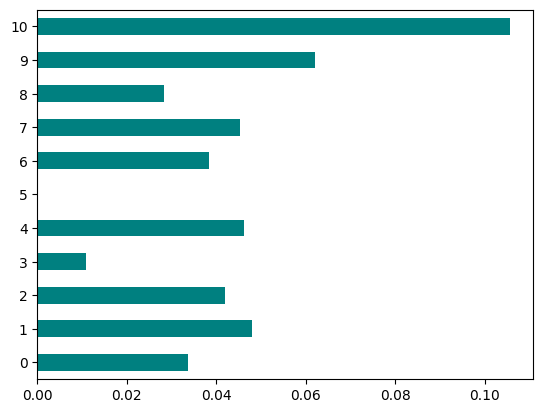

In [67]:
info = mutual_info_classif(X_train, y_train)
feature_imp = pd.Series(info, X_train.columns)
feature_imp.plot(kind='barh', color='teal')
plt.show()

# Dimensionality reduction using PCA

In [58]:
pca = PCA(n_components=11)
pca.fit(X_train)
pca.explained_variance_ratio_

array([0.27533711, 0.1848141 , 0.14159154, 0.09964228, 0.08712663,
       0.06177731, 0.05476539, 0.04157288, 0.03012544, 0.01755061,
       0.00569671])

Text(0, 0.5, 'Explained variance')

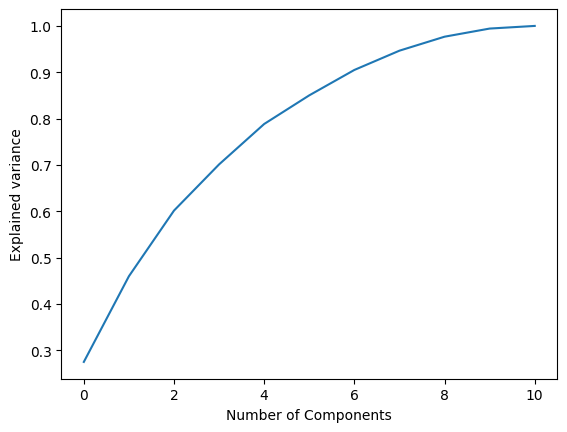

In [62]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained variance')

In [63]:
pca = PCA(n_components=0.95)
pca.fit(X_train)
pca.explained_variance_ratio_

array([0.27533711, 0.1848141 , 0.14159154, 0.09964228, 0.08712663,
       0.06177731, 0.05476539, 0.04157288, 0.03012544])

# Create pipeline for classification

In [77]:
X = df.drop(['quality', 'output'], axis=1)
y = df['output']
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.5, random_state=101, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_rem, y_rem, test_size=0.5, random_state=101, stratify=y_rem)

# Logistic Regression

In [82]:
clf_pipeline = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('feature_selection', SelectKBest(mutual_info_classif, k=9)),
    ('classification', LogisticRegression())
])

In [83]:
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectKBest(k=9,
                             score_func=<function mutual_info_classif at 0x0000016EF10553A0>)),
                ('classification', LogisticRegression())])

In [85]:
y_test_pred = clf_pipeline.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       345
           1       0.73      0.20      0.31        55

    accuracy                           0.88       400
   macro avg       0.81      0.59      0.62       400
weighted avg       0.86      0.88      0.85       400



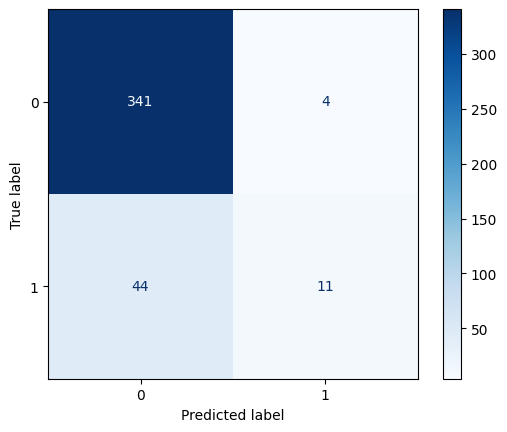

In [99]:
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1])
cmd.plot(cmap='Blues')